<h1 style='color:red'> House Price Prediction

## Import Libraries and load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [2]:
df = pd.read_csv('house.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## EDA

### 1. Missing Value  Handling

In [3]:
df.shape

(13320, 9)

In [4]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [5]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [6]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

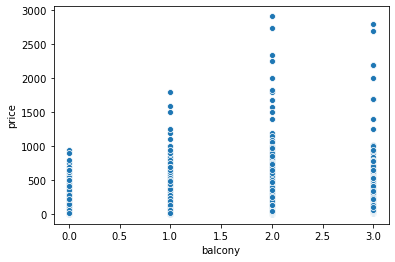

In [7]:
sns.scatterplot(df['balcony'], df['price'])

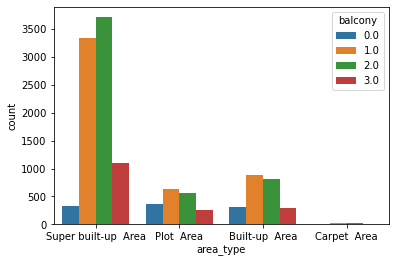

In [8]:
sns.countplot(df['area_type'], hue='balcony', data=df)

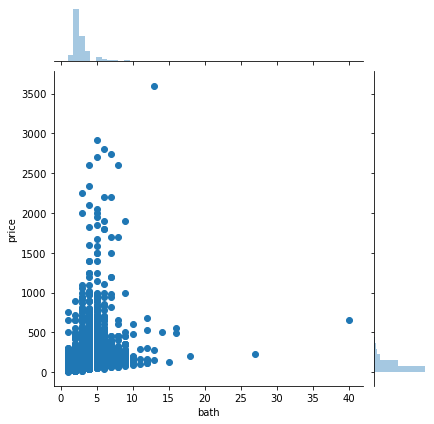

In [9]:
sns.jointplot(x=df['bath'], y=df['price'], data=df)

<h2 style='color:blue'> Handling Missing Value 

In [10]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

#### Remove Columns (Feature Selection)

In [11]:
del_col = ['area_type','availability','society','balcony']
df1 = df.drop(del_col, axis=1)

In [12]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

#### Removing rows with NaN value

In [13]:
df2 = df1.dropna()

In [14]:
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

<h2 style='color:blue'> Data Transformation

### Explore size column (Remove string)

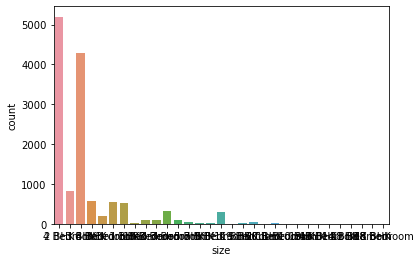

In [15]:
sns.countplot(df2['size'])

In [16]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
df2['BHK'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))

<ipython-input-17-b8788dc40362>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))


In [18]:
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df2['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

#### OUTLIER

In [20]:
df2[df2['BHK'] >20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


<br>

### Explore total_sqft (convert to float)

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


## Data Cleaning

In [23]:
def convt_sqft_to_num(x):
    tokens = x.split('-')   # splitting with -
    if len(tokens) ==2:
        return (float(tokens[0]) + float(tokens[1]))/2   #count the avg of the range
    try:
        return float(x)
    except:
        return None

In [24]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convt_sqft_to_num)

In [25]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [26]:
df3.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [27]:
df4 = df3.copy()

In [28]:
df4['price_per_sqft'] = df4['price']* 100000 / df4['total_sqft']

In [29]:
df4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [30]:
df4.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
BHK                 int64
price_per_sqft    float64
dtype: object

### Explore Location Feature

In [31]:
df4['location'] = df4['location'].apply(lambda x : x.strip())

loc_status = df4.groupby('location')['location'].agg('count')
loc_status.sort_values(ascending = False)

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [32]:
len(loc_status[loc_status <=10])

1052

In [33]:
loc_status_less_10 = loc_status[loc_status <=10]

In [34]:
df4['location'] = df4['location'].apply(lambda x : 'other' if x in loc_status_less_10 else x)
df4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [35]:
df4.shape

(13246, 7)

### Outlier Remove

As general, total_sqft per bedroom can't be less than 300

In [36]:
df4[df4['total_sqft']/ df4['BHK'] <300 ].head()  #remove these rows

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [37]:
df5 = df4[~(df4['total_sqft']/ df4['BHK'] <300) ]
print(df5.head())
df5.shape

                   location       size  total_sqft  bath   price  BHK  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000  


(12502, 7)

#### price_per_sqft

In [38]:
df5['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Remove rows

In [39]:
def rm_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mn = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        
        reduced_df = subdf[(subdf['price_per_sqft'] > (mn-st)) & (subdf['price_per_sqft'] <= (mn+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [40]:
df6 = rm_pps_outliers(df5)
df6.shape

(10241, 7)

##### plot a scatter plot for 2 and 3 bedroom

In [41]:
def scatter_chart(df, location):
    bhk2 = df[(df['location'] == location) & (df['BHK'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['BHK'] == 3)]
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    
    plt.scatter(bhk2['total_sqft'], bhk2['price_per_sqft'], label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'], bhk3['price_per_sqft'], marker='+',label= '3 BHK', s= 50, color='green')
    plt.xlabel("Total Square Feat Area")
    plt.ylabel("Price per Sqft")
    plt.title(location)
    plt.legend()

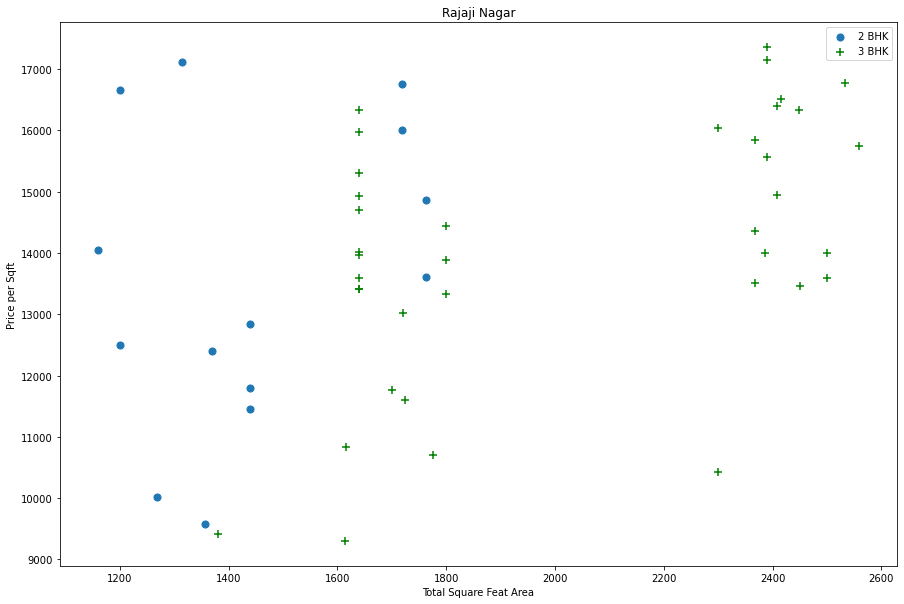

In [42]:
scatter_chart(df6, 'Rajaji Nagar')

#### remove 2 bedroom having value less than 1 bedroom

In [43]:
def rm_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df['price_per_sqft']),
                'std'  : np.std(bhk_df['price_per_sqft']),
                'count' : bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats  = bhk_stats.get(bhk -1)
            
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft'] < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [44]:
df7 = rm_bhk_outliers(df6)
df7.shape

(7329, 7)

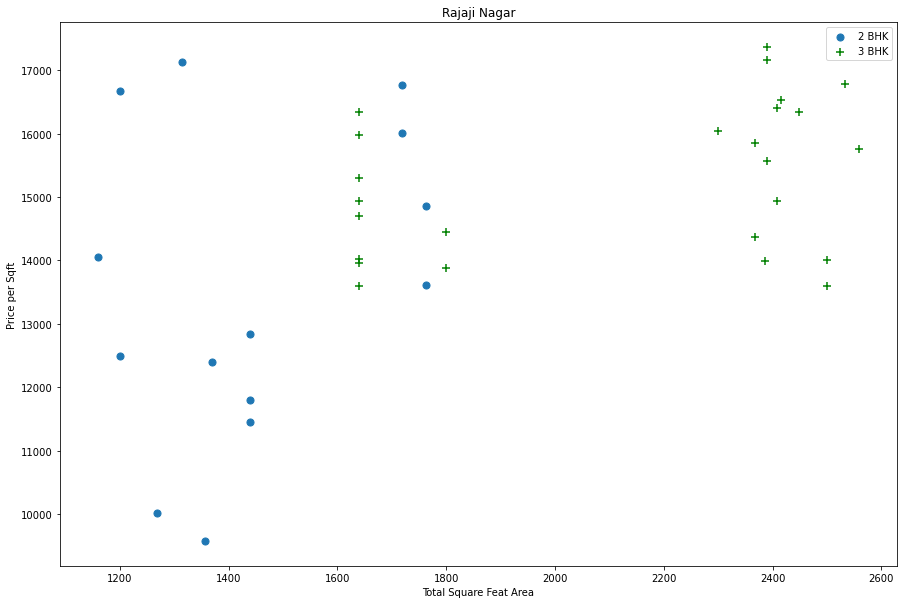

In [45]:
scatter_chart(df7, 'Rajaji Nagar')

Text(0, 0.5, 'Count')

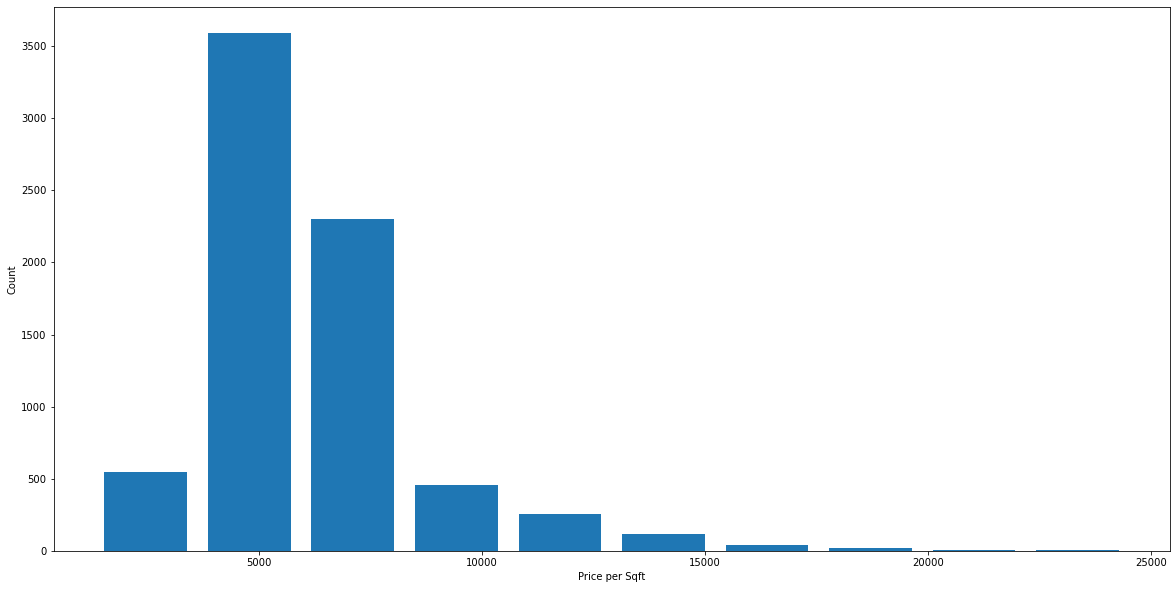

In [46]:
#### HISTOGRAM

matplotlib.rcParams['figure.figsize'] = (20,10)

plt.hist(df7['price_per_sqft'], rwidth=0.8)
plt.xlabel("Price per Sqft")
plt.ylabel('Count')

BATHROOM



In [47]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Remove #bath greater than #bedroom + 2   (After discussion )

Text(0, 0.5, 'count')

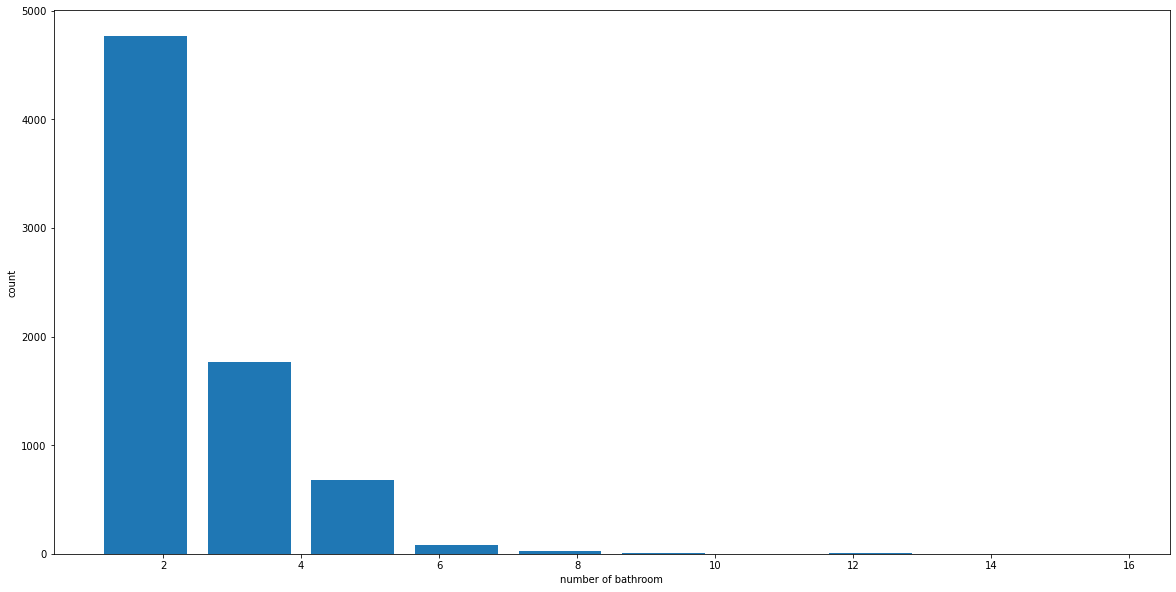

In [48]:
plt.hist(df7['bath'], rwidth=0.8)
plt.xlabel('number of bathroom')
plt.ylabel('count')

In [49]:
df8 = df7[df7['bath'] < df7['BHK']+2]
df8

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [50]:
df9 = df8.drop(['size','price_per_sqft'], axis=1)
df9.shape

(7251, 5)

In [51]:
df9.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [52]:
dummies = pd.get_dummies(df9['location'])
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
df10 = pd.concat([df9, dummies.drop('other', axis=1)], axis=1)
df10

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df11 = df10.drop('location', axis=1)
df11.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train Test Split

In [55]:
X = df11.drop('price', axis=1)
y = df11['price']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<br>

## ML Model Building

### 1. Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [58]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8406397808899619

In [59]:
model.score(X_test, y_test)

0.8746160116853263

### 2. Decision Tree

In [60]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()

In [61]:
DT_model.fit(X_train, y_train)
DT_model.score(X_train, y_train)

0.9912633264763308

In [62]:
DT_model.score(X_test, y_test)

0.6686499170273108

### 3. Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()

In [64]:
RF_model.fit(X_train, y_train)
RF_model.score(X_train, y_train)

0.9542934598313246

In [65]:
RF_model.score(X_test, y_test)

0.8231559525577569

### SuffleSplit

In [66]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=10)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84522777, 0.80004632, 0.88682995, 0.842265  , 0.86250633,
       0.87321693, 0.84573869, 0.84156637, 0.80632718, 0.84981267])

### GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [68]:
def find_best_model(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        }, # end of linear_reg
        
        'lasso' :{
            'model' : Lasso(),
            'params' :{
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        }, # end of Lasso
        
        'decision_tree' :{
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        } #end of DT
    }
    
    

    scores = []

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [69]:
find_best_model(X, y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687465,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.720237,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


#### Predict Function

In [70]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return model.predict([x])[0]

In [71]:
predict_price('Indira Nagar', 1000, 2, 2 )

151.47196040304192

In [72]:
predict_price('Indira Nagar', 1000, 2, 3 )

148.537085962026

In [73]:
predict_price('1st Phase JP Nagar', 1000, 2, 3)

90.2284691231355

In [74]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

93.16334356415142

## Pickle FIle

In [75]:
import pickle

with open('house.pickle', 'wb') as f:
    pickle.dump(model, f)

## Generate Column JSon File

In [76]:
import json

columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))